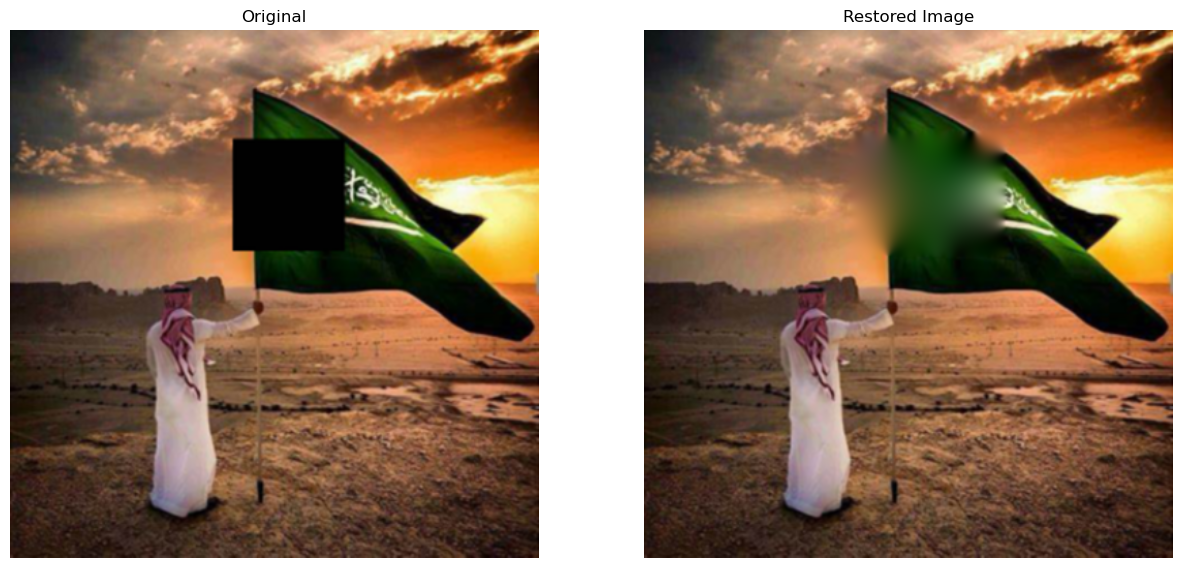

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.restoration import inpaint
from skimage.transform import resize
from skimage import color

def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    
def plot_comparison(img_original, img_filtered, img_title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 8), sharex=True, sharey=True)
    ax1.imshow(img_original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(img_filtered, cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')
    plt.show()

# Load and process the defective image
defect_image = plt.imread('Picture2.png')
defect_image = resize(defect_image, (512, 512))

#Create mask for the image
mask = np.zeros(defect_image.shape[:2], dtype=np.uint8)
mask[100:220, 200:350] = 1  

# Apply the restoration function to the image using the mask
restored_image = inpaint.inpaint_biharmonic(defect_image, mask, channel_axis=2)

# Display the original and restored image
plot_comparison(defect_image, restored_image, 'Restored Image')


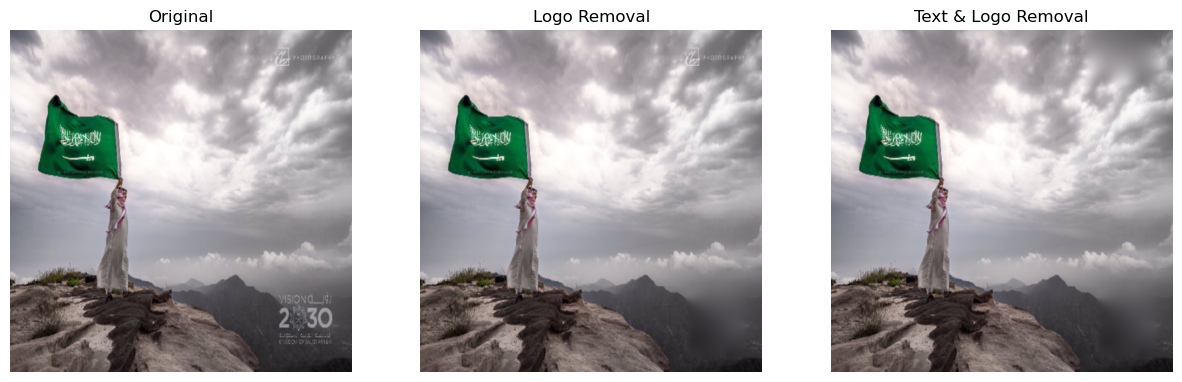

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.restoration import inpaint
from skimage.transform import resize
from skimage import color

def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    
def plot_comparison(img_original, img_filtered, img_title_filtered, img_filtered_text, img_title_filtered_text):
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15, 8), sharex=True, sharey=True)
    ax1.imshow(img_original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(img_filtered, cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')
    ax3.imshow(img_filtered_text, cmap=plt.cm.gray)
    ax3.set_title(img_title_filtered_text)        
    ax3.axis('off')
    plt.show()

#Load the first defective image
defect_image = plt.imread('Picture1.png')
defect_image = resize(defect_image, (512, 512))

#Create mask for the first image
mask = np.zeros(defect_image.shape[:2], dtype=np.uint8)
mask[380:490, 400:490] = 1  

# Apply the restoration function to the image using the mask
restored_image = inpaint.inpaint_biharmonic(defect_image, mask, channel_axis=2)

#Load the second defective image
defect_text_image = restored_image
defect_text_image = resize(defect_text_image, (512, 512))

#Create mask for the second image
mask_text = np.zeros(defect_text_image.shape[:2], dtype=np.uint8)
mask_text[0:80, 380:490] = 1  

# Apply the restoration function to the image using the mask
restored_text_image = inpaint.inpaint_biharmonic(defect_text_image, mask_text, channel_axis=2)

# Display the original and restored images
plot_comparison(defect_image, restored_image, 'Logo Removal', restored_text_image, 'Text & Logo Removal')
